# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [3]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

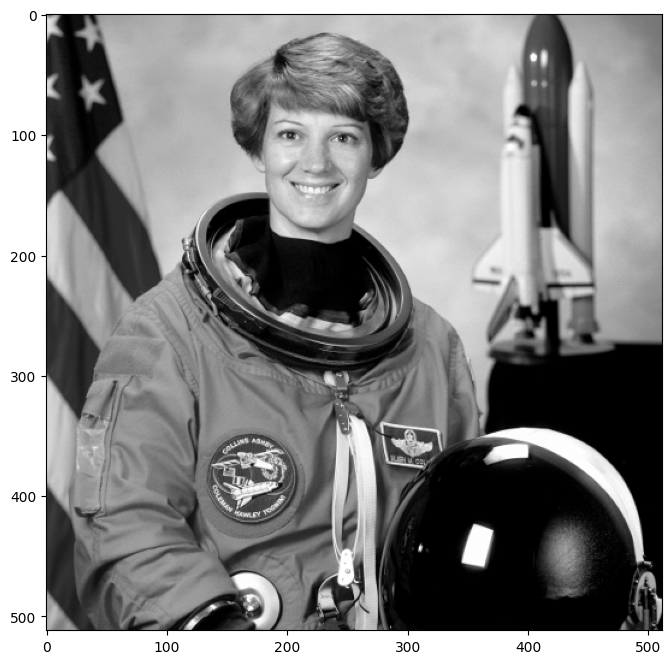

In [26]:
img=plt.imread('data/astronaut.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')
img5=plt.imread('data/astronaut_meanfilter5.png')
med5=plt.imread('data/astronaut_medianfilter5.png')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [27]:
print(img.shape)
print(numpy.ndindex(img.shape))

(512, 512)


In [28]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            x=q[1]+p[1]-n
            y=q[0]+p[0]-n
            if x>=0 and y>=0 and x<img_in.shape[1] and y<img_in.shape[0]:
                neighborhood_sum+=img_in[y,x]
            else:
                neighborhood_sum=0
                break
        result[p]=neighborhood_sum/(size**2)
            
            
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

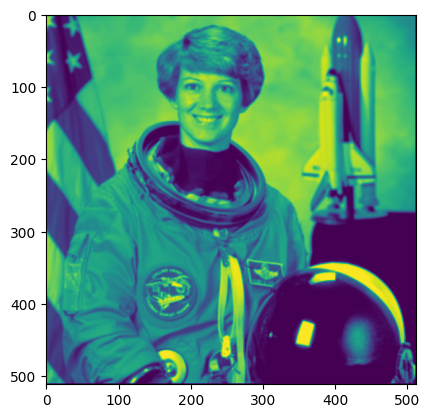

In [29]:
plt.imshow(meanfilter(img,3))


**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [30]:
assert numpy.allclose(meanfilter(img,5),img5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [39]:
5**2//2

12

In [49]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_list = []
        for q in numpy.ndindex(size, size):
            e=False
            x=q[1]+p[1]-n
            y=q[0]+p[0]-n
            if x>=0 and y>=0 and x<img_in.shape[1] and y<img_in.shape[0]:
                neighborhood_list.append(img_in[y,x])
            else:
                value=0
                e=True
                break
        if e==False:
            s_list=sorted(neighborhood_list)
            value=s_list[(size**2)//2]
        result[p]=value 
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

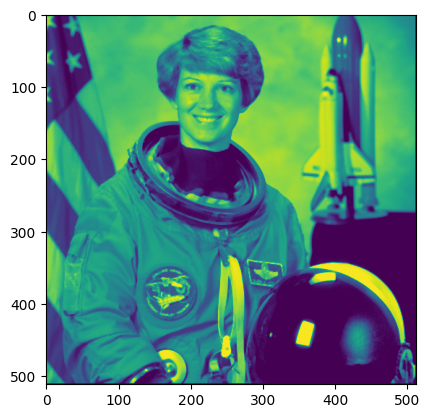

In [50]:
plt.imshow(medianfilter(img,3))

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [51]:
assert numpy.allclose(medianfilter(img,5), med5, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [52]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

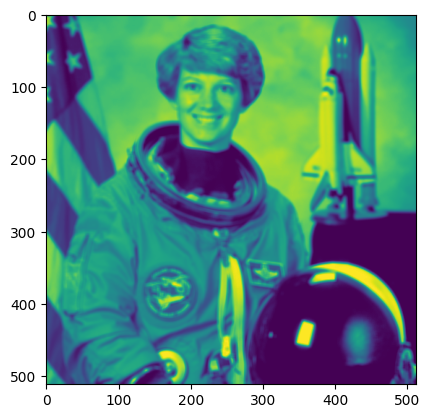

In [62]:
plt.imshow(scipy.ndimage.uniform_filter(img, 5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

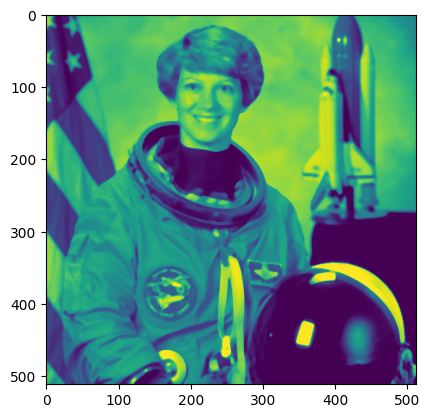

In [66]:
plt.imshow(scipy.ndimage.median_filter(img, 5))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

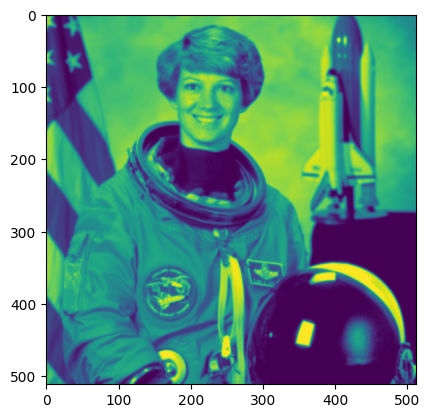

In [69]:
plt.imshow(scipy.ndimage.gaussian_filter(img, 1))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [92]:
def fastfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        if p[0]-n>=0 and p[1]-n>=0 and p[0]+n<img_in.shape[0] and p[1]+2<img_in.shape[1]:
            f=img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1].flatten()
            s=sorted(f)
            value=s[size**2//2]
        else:
            value=0
        result[p]=value
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

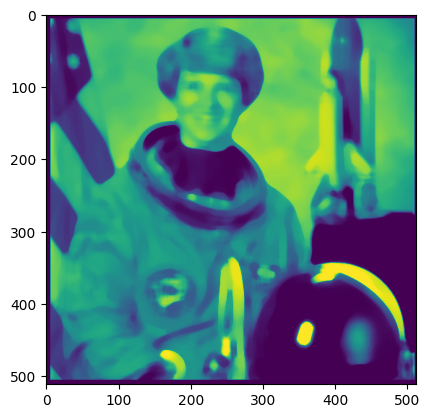

In [ ]:
plt.imshow(fastfilter(img,23))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

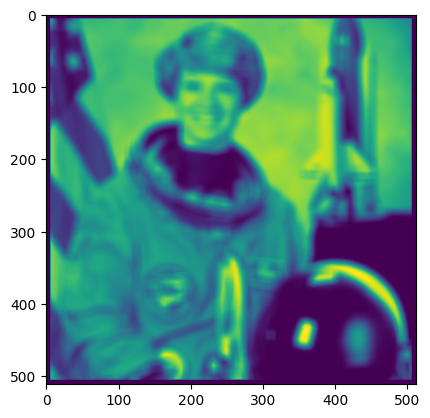

In [96]:
plt.imshow(medianfilter(img,13))

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [97]:
%timeit fastfilter(img, 5)
%timeit medianfilter(img, 5)

1.76 s ± 47.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.59 s ± 97.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: